In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, InputLayer
from tensorflow.keras.callbacks import ModelCheckpoint

In [8]:
# carrega o dataset
df = pd.read_csv("dataset.csv")
df.index = pd.to_datetime(df["id"], errors="ignore")

C:\Users\lucas\AppData\Local\Temp\ipykernel_21664\1432928690.py:3: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  df.index = pd.to_datetime(df["id"], errors="ignore")


In [9]:
# inserção das colunas que vão para o treinamento
cols = [
    "press",
    "humid",
    "temp",
    "ws100",
    "verts100",
    "wdir100",
    "cis6",
    "cis7",
    "wdisp100",
    "vertdisp100",
]
df_for_training = df[cols].astype(float)

In [10]:
# oor enquanto estou usando o StardardScaler msm
scaler = StandardScaler()
df_for_training_scaled = scaler.fit_transform(df_for_training)

In [11]:
# aqui defino a quantidade de dados para realizar a previsão
sequence_length = 36
X, y = [], []

for i in range(len(df_for_training_scaled) - sequence_length):
    X.append(df_for_training_scaled[i : i + sequence_length])
    y.append(df_for_training_scaled[i + sequence_length])

X = np.array(X)
y = np.array(y)

print(f"Formato de X: {X.shape}")
print(f"Formato de y: {y.shape}")

Formato de X: (7525, 36, 12)
Formato de y: (7525, 12)


In [12]:
# divião de dados de treinamento e teste. 80% treinamento, 20% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [13]:
# definição do modelo
model1 = Sequential(
    [
        InputLayer(shape=(sequence_length, len(cols))),
        LSTM(256),
        Dense(len(cols), activation="linear"),
    ]
)

model1.compile(optimizer="adam", loss="mse")
cp1 = ModelCheckpoint("model1.keras", save_best_only=True)

In [14]:
# treinamento
model1.fit(
    X_train, y_train, validation_data=(X_test, y_test), epochs=15, callbacks=[cp1]
)

# faz a previsão baseado no modelo criado
y_pred = model1.predict(X_test)

Epoch 1/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 16s 80ms/step - loss: 0.3488 - val_loss: 0.3095
Epoch 2/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 14s 76ms/step - loss: 0.2349 - val_loss: 0.2845
Epoch 3/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 14s 76ms/step - loss: 0.2150 - val_loss: 0.2767
Epoch 4/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 14s 72ms/step - loss: 0.2092 - val_loss: 0.2744
Epoch 5/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 13s 71ms/step - loss: 0.2116 - val_loss: 0.2674
Epoch 6/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 13s 66ms/step - loss: 0.2133 - val_loss: 0.2754
Epoch 7/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 13s 67ms/step - loss: 0.2072 - val_loss: 0.2682
Epoch 8/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - loss: 0.2056 - val_loss: 0.2639
Epoch 9/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 14s 72ms/step - loss: 0.2146 - val_loss: 0.2709
Epoch 10/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 14s 73ms/step - loss: 0.2058 - val_loss: 0.2688
Epoch 11/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 13s 66ms/step - loss: 0.2014 - val_loss: 0.2736
Epoch 12/15
189/189 ━━━━━━━━━━

In [15]:
# renormalização dos dados
y_pred_orig = scaler.inverse_transform(y_pred)
y_test_orig = scaler.inverse_transform(y_test)

'press': RMSE = 0.3937, NRMSE = 0.0492, Erro Relativo = 0.03%


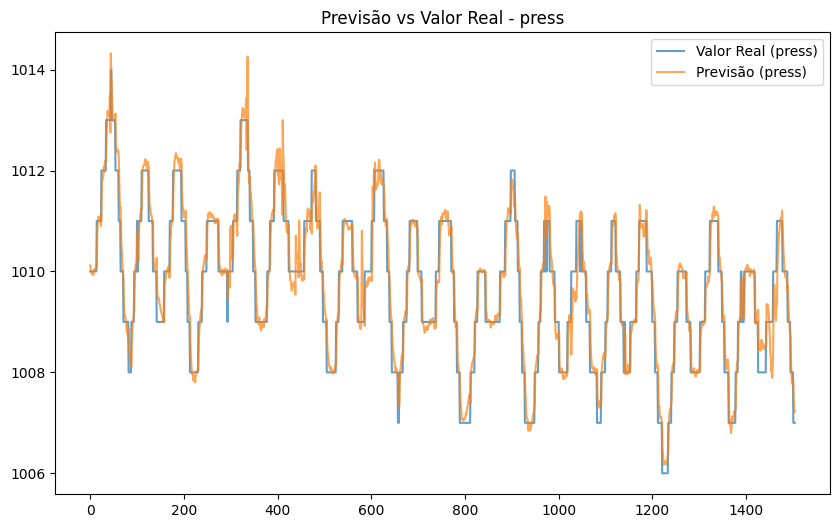

'humid': RMSE = 1.4340, NRMSE = 0.0377, Erro Relativo = 1.39%


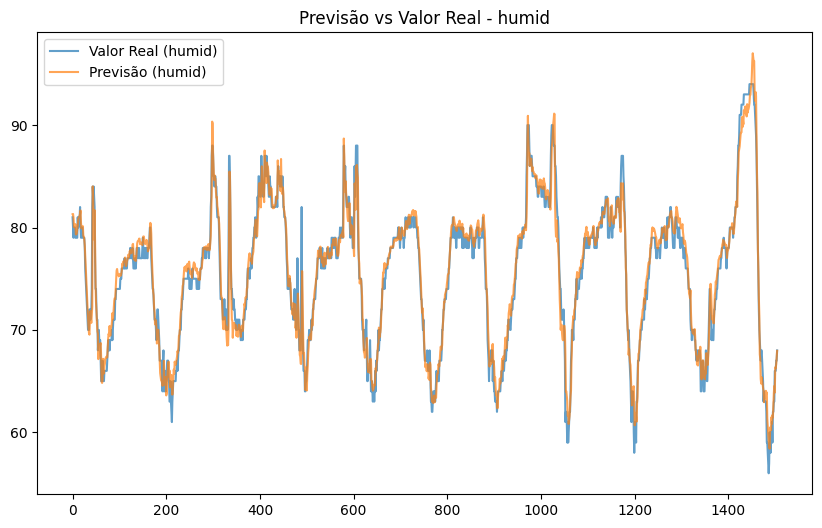

'temp': RMSE = 0.2770, NRMSE = 0.0334, Erro Relativo = 0.64%


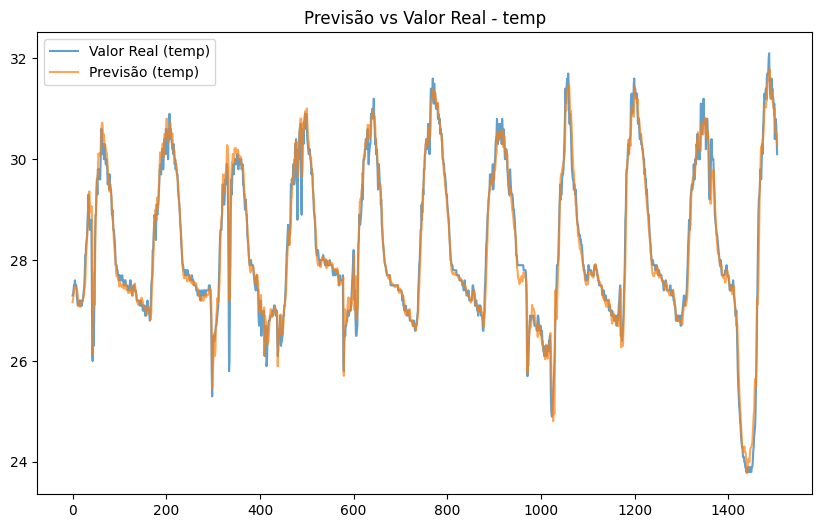

'ws100': RMSE = 0.6276, NRMSE = 0.0645, Erro Relativo = 6.24%


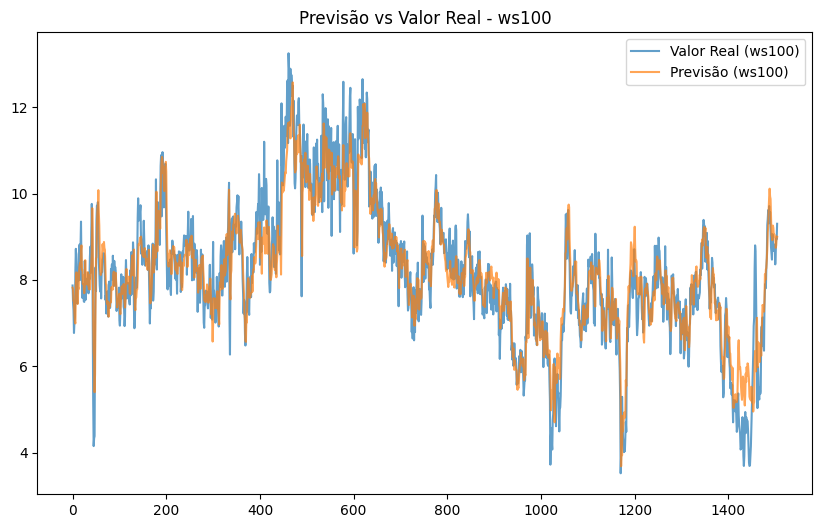

'verts100': RMSE = 0.2676, NRMSE = 0.0708, Erro Relativo = inf%


C:\Users\lucas\AppData\Local\Temp\ipykernel_21664\4065353955.py:9: RuntimeWarning: divide by zero encountered in divide
  np.mean(np.abs((y_test_orig[:, i] - y_pred_orig[:, i]) / y_test_orig[:, i]))


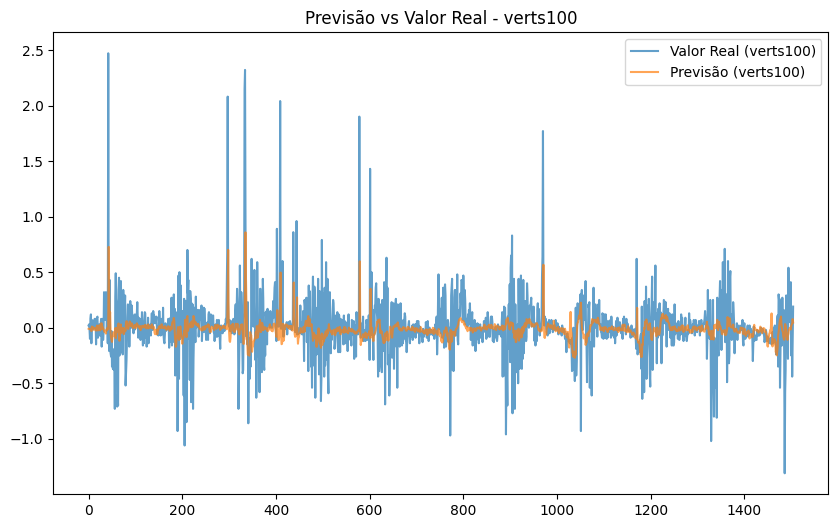

'wdir100': RMSE = 5.0688, NRMSE = 0.0387, Erro Relativo = 7.56%


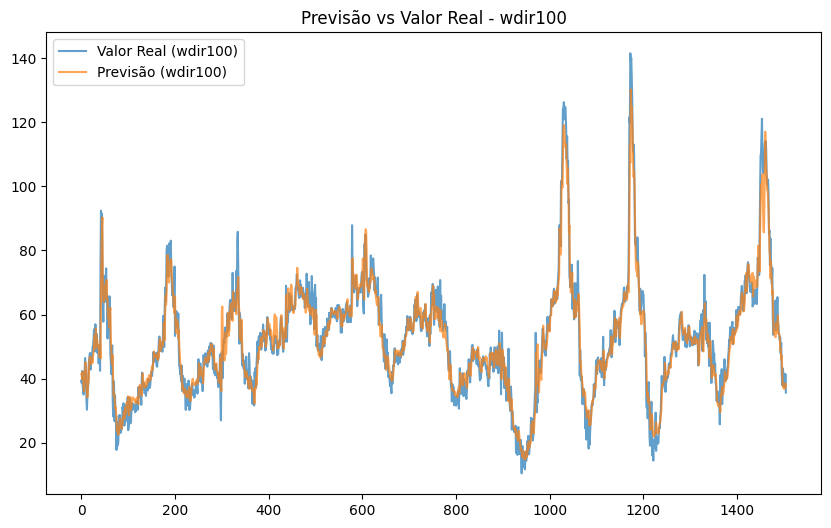

'cis5': RMSE = 0.0054, NRMSE = 0.0687, Erro Relativo = inf%


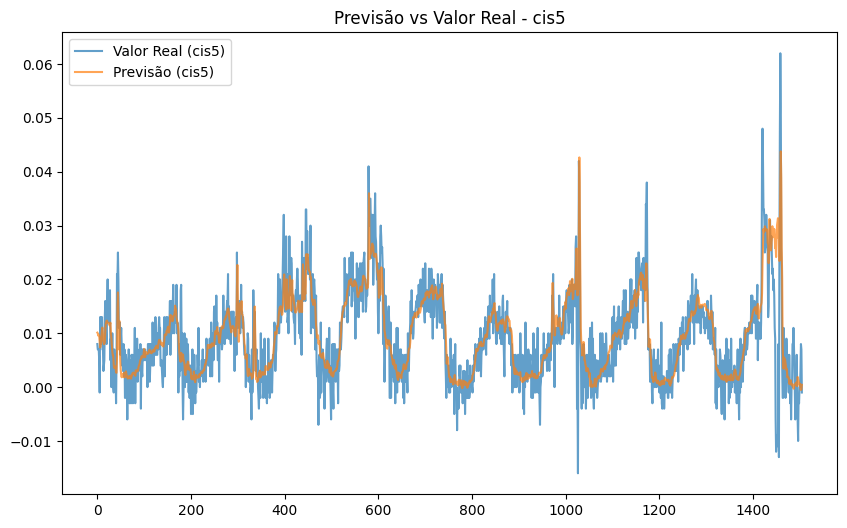

'cis6': RMSE = 0.0049, NRMSE = 0.0574, Erro Relativo = inf%


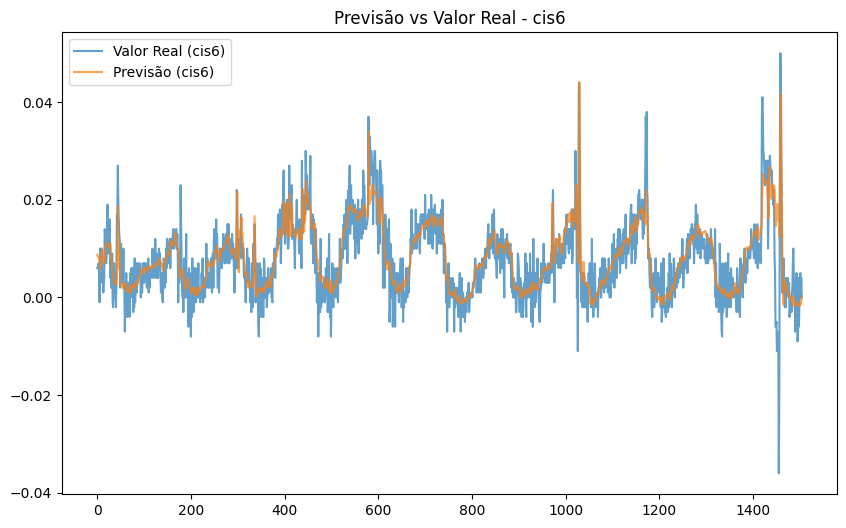

'cis7': RMSE = 0.0049, NRMSE = 0.0567, Erro Relativo = inf%


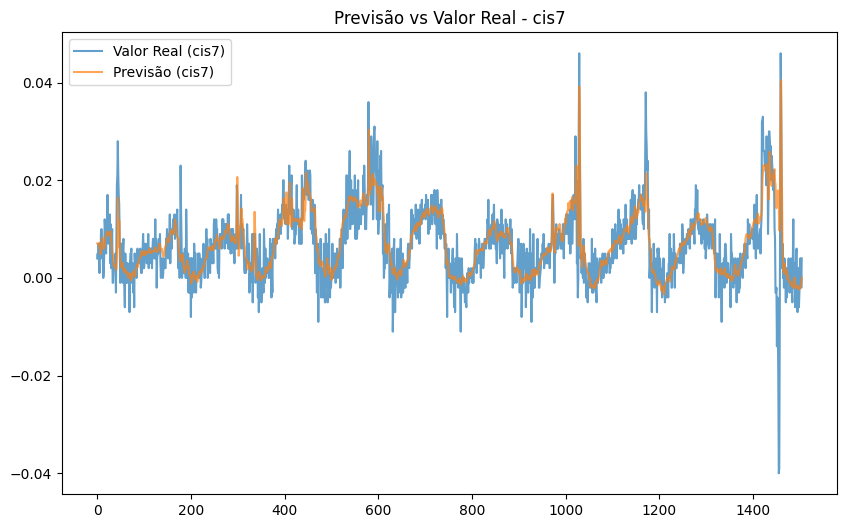

'cis8': RMSE = 0.0043, NRMSE = 0.0569, Erro Relativo = 10998244878507804.00%


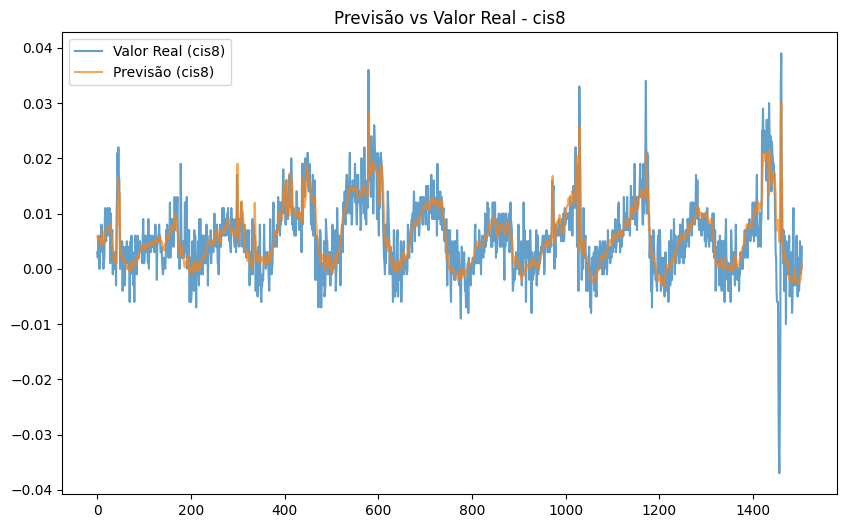

'wdisp100': RMSE = 0.1657, NRMSE = 0.0793, Erro Relativo = 15.38%


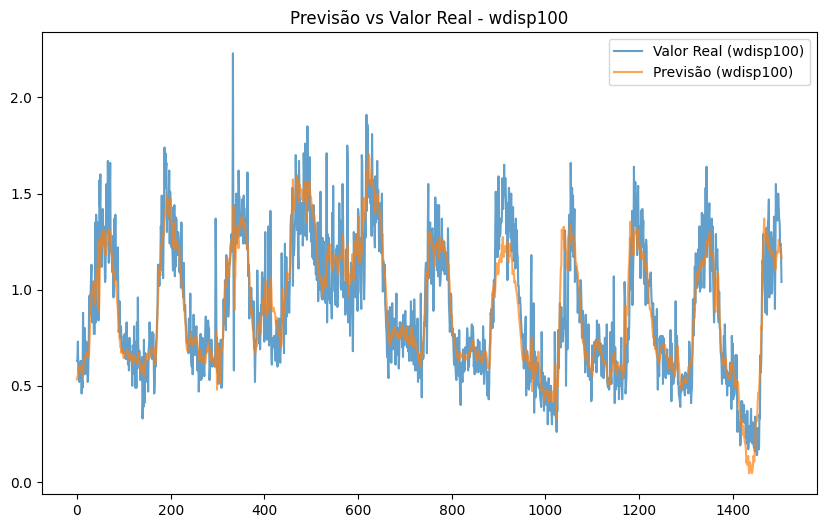

'vertdisp100': RMSE = 0.1452, NRMSE = 0.0651, Erro Relativo = 19.25%


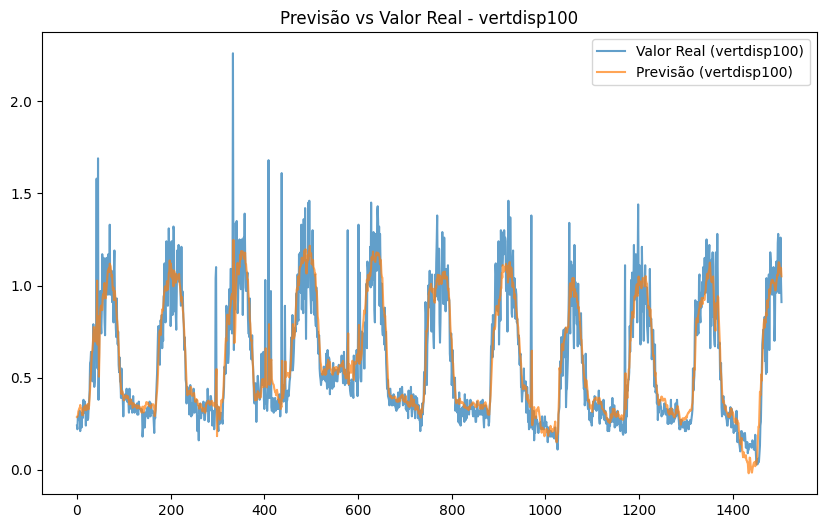

In [16]:
# verificações: RMSE, NRMSE, erro relativo e disposição dos gráficos
for i, col in enumerate(cols):
    # RMSE e NRMSE
    rmse = np.sqrt(np.mean((y_test_orig[:, i] - y_pred_orig[:, i]) ** 2))
    nrmse = rmse / (y_test_orig[:, i].max() - y_test_orig[:, i].min())

    # erro relativo médio
    erro_relativo = (
        np.mean(np.abs((y_test_orig[:, i] - y_pred_orig[:, i]) / y_test_orig[:, i]))
        * 100
    )

    print(
        f"'{col}': RMSE = {rmse:.4f}, NRMSE = {nrmse:.4f}, Erro Relativo = {erro_relativo:.2f}%"
    )

    plt.figure(figsize=(10, 6))
    plt.plot(y_test_orig[:, i], label=f"Valor Real ({col})", alpha=0.7)
    plt.plot(y_pred_orig[:, i], label=f"Previsão ({col})", alpha=0.7)
    plt.legend()
    plt.title(f"Previsão vs Valor Real - {col}")
    plt.show()

In [17]:
# análise de correlação entre variáveis e 'ws100'
correlations = df_for_training.corr(method="pearson")
print("\nCorrelação de cada variável com 'ws100':")
print(correlations["ws100"])


Correlação de cada variável com 'ws100':
press          0.072361
humid         -0.433935
temp           0.263363
ws100          1.000000
verts100       0.048717
wdir100        0.152831
cis5           0.108953
cis6           0.082937
cis7           0.062638
cis8           0.044065
wdisp100       0.558741
vertdisp100    0.365820
Name: ws100, dtype: float64
